<h1>Test Assignment Data Analysis (Ignited)</h1>

<h2>Yaroslav Aulin</h2>

yaroslav.v.aulin@gmail.com

In [1]:
# load all necessary libraries

import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# read data into pandas dataframe and display header
df = pd.read_csv("test_data_task.csv",sep=";")
df.head()

/home/yaroslav/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Action Date,Action Name,Age (Receiver),Age (Sender),COUNTRY NAME (d country1),Gender (Receiver),Gender (Sender),Project (Receiver),Project (Sender),Reg Date (Receiver),Reg Date (Sender),Site Name alias (Receiver),Site Name alias (Sender),Tester mark (Receiver),Tester mark (Sender),User ID Vertica (Sender),Number of Records
0,0,10/16/2019 10:15:02,370753320,36,44,China,Female,Male,10,10,12/2/2014 18:26:12,10/1/2019 02:05:14,491,491,User,User,19731752466,1
1,1,10/5/2019 01:05:19,370753320,27,25,Canada,Female,Male,10,10,10/16/2014 09:30:41,10/5/2019 00:38:08,491,194901,User,User,19816252829,1
2,2,10/12/2019 12:11:59,370753320,29,44,China,Female,Male,10,10,6/24/2014 12:26:10,10/1/2019 02:05:14,491,491,User,User,19731752466,1
3,3,10/16/2019 10:15:36,370753320,30,44,China,Female,Male,10,10,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466,1
4,4,10/15/2019 10:05:04,370753320,29,44,China,Female,Male,10,10,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466,1


In [6]:
# rename some columns

df.rename(columns={'COUNTRY NAME (d country1)':'Country','User ID Vertica (Sender)':'User ID (Sender)'},inplace=True)
df.head()

,Unnamed: 0,Action Date,Action Name,Age (Receiver),Age (Sender),Country,Gender (Receiver),Gender (Sender),Project (Receiver),Project (Sender),Reg Date (Receiver),Reg Date (Sender),Site Name alias (Receiver),Site Name alias (Sender),Tester mark (Receiver),Tester mark (Sender),User ID (Sender),Number of Records
0,0,10/16/2019 10:15:02,370753320,36,44,China,Female,Male,10,10,12/2/2014 18:26:12,10/1/2019 02:05:14,491,491,User,User,19731752466,1
1,1,10/5/2019 01:05:19,370753320,27,25,Canada,Female,Male,10,10,10/16/2014 09:30:41,10/5/2019 00:38:08,491,194901,User,User,19816252829,1
2,2,10/12/2019 12:11:59,370753320,29,44,China,Female,Male,10,10,6/24/2014 12:26:10,10/1/2019 02:05:14,491,491,User,User,19731752466,1
3,3,10/16/2019 10:15:36,370753320,30,44,China,Female,Male,10,10,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466,1
4,4,10/15/2019 10:05:04,370753320,29,44,China,Female,Male,10,10,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466,1


In [7]:
# of entries in the database, number of columns

df.shape

(1922077, 18)

In [8]:
# number of rows in the dataframe
df_len=df.shape[0]

In [9]:
# explore dataframe (unique values of columns)

In [10]:
df['Project (Receiver)'].unique()

array([10])

In [11]:
df['Project (Sender)'].unique()

array([10])

In [12]:
df['Number of Records'].unique()

array([1])

In [13]:
# We can drop these three columns as well as Unnamed:0
df.drop({'Unnamed: 0','Project (Receiver)','Project (Sender)','Number of Records'}, axis='columns', inplace=True)
df.head()


,Action Date,Action Name,Age (Receiver),Age (Sender),Country,Gender (Receiver),Gender (Sender),Reg Date (Receiver),Reg Date (Sender),Site Name alias (Receiver),Site Name alias (Sender),Tester mark (Receiver),Tester mark (Sender),User ID (Sender)
0,10/16/2019 10:15:02,370753320,36,44,China,Female,Male,12/2/2014 18:26:12,10/1/2019 02:05:14,491,491,User,User,19731752466
1,10/5/2019 01:05:19,370753320,27,25,Canada,Female,Male,10/16/2014 09:30:41,10/5/2019 00:38:08,491,194901,User,User,19816252829
2,10/12/2019 12:11:59,370753320,29,44,China,Female,Male,6/24/2014 12:26:10,10/1/2019 02:05:14,491,491,User,User,19731752466
3,10/16/2019 10:15:36,370753320,30,44,China,Female,Male,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466
4,10/15/2019 10:05:04,370753320,29,44,China,Female,Male,5/1/2015 05:47:55,10/1/2019 02:05:14,491,491,User,User,19731752466


In [14]:
# explore remaining columns

In [15]:
df['Action Name'].unique()

array([370753320,      2725,         3, 343503320,         4,         1,
               2, 370753321])

In [16]:
df['Age (Receiver)'].unique()

array(['36', '27', '29', '30', '38', '33', '32', '28', '25', '34', '35',
       '40', '26', '24', '23', '31', '50', '41', '42', '46', '22', '39',
       '43', '51', '37', '21', '48', '19', '20', '18', '61', '54', '45',
       '66', '57', '49', '55', '52', '78', '56', '60', '62', '59', '65',
       '64', '58', '53', '67', '44', '70', '74', '47', '68', '71', '69',
       '77', '63', '72', '76', '75', 'other', '73', '79', 69, 57, 62, 56,
       47, 65, 41, 49, 70, 31, 46, 55, 52, 37, 66, 77, 53, 40, 45, 30, 43,
       58, 25, 78, 61, 48, 21, 19, 50, 32, 59, 60, 38, 18, 63, 64, 36, 67,
       44, 51, 35, 20, 39, 27, 42, 71, 76, 68, 33, 29, 54, 34, 72, 75, 23,
       24, 26, 22, 28, 73, 74, '80', '82', 80, 79, 82], dtype=object)

In [17]:
# have to convert all data to int, 'other' -> nan
df['Age (Receiver)']=df['Age (Receiver)'].astype(str)
df['Age (Receiver)']=pd.to_numeric(df['Age (Receiver)'],errors='coerce')
df['Age (Receiver)'].unique()


array([36., 27., 29., 30., 38., 33., 32., 28., 25., 34., 35., 40., 26.,
       24., 23., 31., 50., 41., 42., 46., 22., 39., 43., 51., 37., 21.,
       48., 19., 20., 18., 61., 54., 45., 66., 57., 49., 55., 52., 78.,
       56., 60., 62., 59., 65., 64., 58., 53., 67., 44., 70., 74., 47.,
       68., 71., 69., 77., 63., 72., 76., 75., nan, 73., 79., 80., 82.])

In [18]:
df['Age (Sender)'].unique()

array([44, 25, 52, 42, 56, 26, 23, 31, 50, 60, 41, 55, 34, 27, 51, 36, 35,
       43, 66, 54, 45, 47, 22, 28, 18, 40, 49, 58, 38, 37, 61, 30, 46, 64,
       33, 65, 75, 48, 24, 21, 39, 32, 53, 20, 78, 59, 57, 29, 19, 76, 69,
       70, 63, 71, 62, 73, 68, 74, 67, '26', '44', '24', '34', '35', '40',
       '32', '25', '23', '19', '27', '28', '50', '22', '36', '33', '31',
       '29', '41', '30', '43', '42', '39', '57', '47', '37', '21', '45',
       '18', '59', '55', '65', '54', '70', '69', '63', '58', '49', '46',
       '52', '48', '56', '62', 'other', '61', '66', '38', '51', '67',
       '74', '20', '53', 72, 77, '64', '60', '68', '76', '71', '78'],
      dtype=object)

In [19]:
# convert all data to int, 'other' -> nan
df['Age (Sender)']=df['Age (Sender)'].astype(str)
df['Age (Sender)']=pd.to_numeric(df['Age (Sender)'],errors='coerce')
df['Age (Sender)'].unique()

array([44., 25., 52., 42., 56., 26., 23., 31., 50., 60., 41., 55., 34.,
       27., 51., 36., 35., 43., 66., 54., 45., 47., 22., 28., 18., 40.,
       49., 58., 38., 37., 61., 30., 46., 64., 33., 65., 75., 48., 24.,
       21., 39., 32., 53., 20., 78., 59., 57., 29., 19., 76., 69., 70.,
       63., 71., 62., 73., 68., 74., 67., nan, 72., 77.])

In [20]:
df['Country'].unique()

array(['China', 'Canada', 'United States of America', 'Australia', 'Chad',
       'United Kingdom', 'India', 'Kenya', 'Nigeria', 'Italy',
       'Luxembourg', 'Bangladesh', 'Cameroon', 'Ghana', 'Ukraine',
       'Russian Federation', 'Czechia', 'Botswana', 'Poland',
       'United Arab Emirates', 'British Virgin Islands', 'Turkey',
       'Pakistan', 'Philippines', 'Sierra Leone', 'Gambia', 'Germany',
       'Brazil', 'Albania', 'Tanzania', 'Sweden', 'Japan', 'Saudi Arabia',
       'Qatar', 'Greece', 'Uganda', 'Rwanda', 'Portugal', 'Ivory Coast',
       'Netherlands', 'Ireland', 'Singapore', 'New Zealand', 'Iraq',
       'Barbados', 'Nepal', 'Faroe Islands', 'Cuba', 'Ethiopia'],
      dtype=object)

In [21]:
df['Country'].unique().shape

(49,)

In [22]:
# users are coming from 39 different countries

In [23]:
df['Gender (Receiver)'].unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df['Gender (Sender)'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
# convert Action Date, Reg Date(Receiver), Reg Date (Sender) to datetime

df['Action Date']=pd.to_datetime(df['Action Date'],format="%m/%d/%Y  %H:%M:%S")
df['Reg Date (Receiver)']=pd.to_datetime(df['Reg Date (Receiver)'],format="%m/%d/%Y  %H:%M:%S")
df['Reg Date (Sender)']=pd.to_datetime(df['Reg Date (Sender)'],format="%m/%d/%Y  %H:%M:%S")



In [26]:
df.dtypes

Action Date                   datetime64[ns]
Action Name                            int64
Age (Receiver)                       float64
Age (Sender)                         float64
Country                               object
Gender (Receiver)                     object
Gender (Sender)                       object
Reg Date (Receiver)           datetime64[ns]
Reg Date (Sender)             datetime64[ns]
Site Name alias (Receiver)             int64
Site Name alias (Sender)               int64
Tester mark (Receiver)                object
Tester mark (Sender)                  object
User ID (Sender)                       int64
dtype: object

In [27]:
df['Site Name alias (Receiver)'].unique()

array([   491,      1, 194901])

In [28]:
df['Site Name alias (Sender)'].unique()

array([   491, 194901,      1])

In [29]:
# convert site name alias labels to string

df['Site Name alias (Sender)']=df['Site Name alias (Sender)'].astype(str)
df['Site Name alias (Receiver)']=df['Site Name alias (Receiver)'].astype(str)

In [30]:
df['Tester mark (Receiver)'].unique()

array(['User', 'Tester'], dtype=object)

In [31]:
df['Tester mark (Sender)'].unique()

array(['User', 'Tester'], dtype=object)

In [32]:
df['User ID (Sender)'].unique()

array([19731752466, 19816252829,  4570758637, ..., 19770750773,
       19783501022, 19767502831])

In [34]:
df['User ID (Sender)'].unique().shape

(3900,)

In [35]:
# 3900 unique users on the website

<h3>Some basic statistics on sent messages</h3>

<h4> Action name </h4>

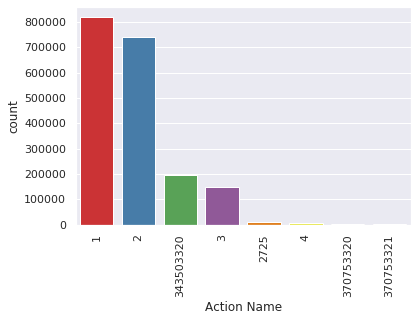

In [36]:
# Action Name

chart = sns.countplot(
    data=df,
    x='Action Name',
    palette='Set1',
    order = df['Action Name'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [40]:
df['Action Name'].value_counts()

1            818048
2            741555
343503320    196570
3            149411
2725           8527
4              4177
370753320      3196
370753321       593
Name: Action Name, dtype: int64

In [41]:
# calculate percentage

df['Action Name'].value_counts()/df_len*100

1            42.560626
2            38.580921
343503320    10.226958
3             7.773414
2725          0.443635
4             0.217317
370753320     0.166278
370753321     0.030852
Name: Action Name, dtype: float64

In [42]:
#  1 43%
#  2 39%
#  343503320 10%
# 3  8%
# less than 1% for the others

<h4> Site Name alias (Sender) </h4>

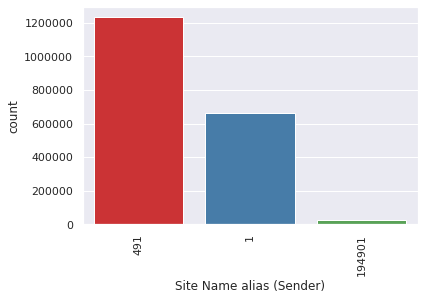

In [44]:
chart = sns.countplot(
    data=df,
    x='Site Name alias (Sender)',
    palette='Set1',
    order = df['Site Name alias (Sender)'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [46]:
df['Site Name alias (Sender)'].value_counts()

491       1232842
1          665671
194901      23564
Name: Site Name alias (Sender), dtype: int64

In [47]:
# calculate percentage

df['Site Name alias (Sender)'].value_counts()/df_len*100

491       64.141135
1         34.632900
194901     1.225965
Name: Site Name alias (Sender), dtype: float64

In [48]:
# 491 64%
# 1 35 %
# 194901 1% 

<h4> Site Name alias (Receiver) </h4>

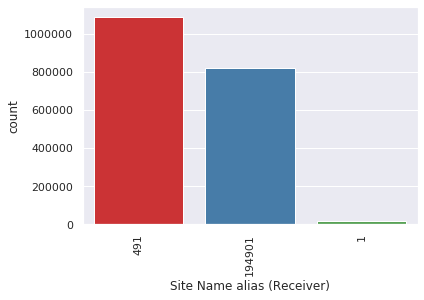

In [50]:
chart = sns.countplot(
    data=df,
    x='Site Name alias (Receiver)',
    palette='Set1',
    order = df['Site Name alias (Receiver)'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);


In [51]:
df['Site Name alias (Receiver)'].value_counts()

491       1086702
194901     818911
1           16464
Name: Site Name alias (Receiver), dtype: int64

In [52]:
df['Site Name alias (Receiver)'].value_counts()/df_len*100

491       56.537901
194901    42.605525
1          0.856573
Name: Site Name alias (Receiver), dtype: float64

In [53]:
# 491 56%
# 194901    43 %
# 1 1%

# 1 is hardly used on receiving side compared to 194901 on sending side

<h4> How Name alias sender and receiver correspond to each other? </h4>

In [54]:
df1=pd.crosstab(df['Site Name alias (Sender)'],df['Site Name alias (Receiver)'])
df1

Site Name alias (Receiver),1,194901,491
Site Name alias (Sender),,,
1,0,278087,387584
194901,8719,0,14845
491,7745,540824,684273


In [55]:
# as we can see there are no 1-1 messages, as well as no 194901-194901 messages

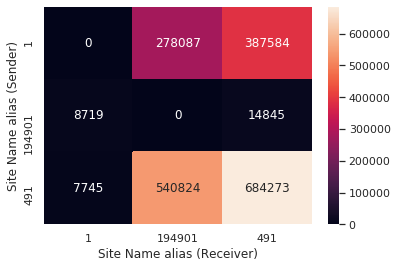

In [57]:
# let's plot a heatmap of number of messages vs sender and receiver aliases

sns.heatmap(df1,annot=True,fmt='d')

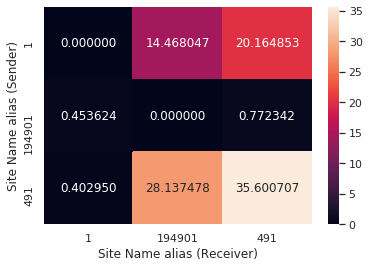

In [58]:
# or the same in percentage of overall communication

df1_norm=df1/df_len*100 # in per cent
sns.heatmap(df1_norm,annot=True,fmt='f')

<h4>Country statistics</h4>

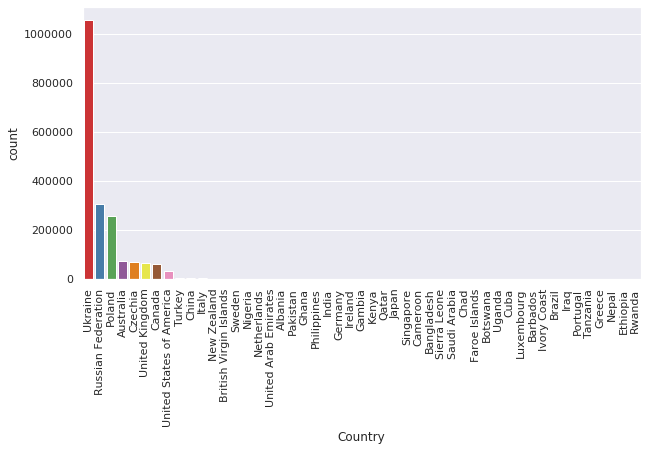

In [60]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df,
    x='Country',
    palette='Set1',
    order = df['Country'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [61]:
df['Country'].value_counts()

Ukraine                     1057048
Russian Federation           306220
Poland                       255197
Australia                     73113
Czechia                       69205
United Kingdom                65833
Canada                        59602
United States of America      30199
Turkey                         1617
China                          1118
Italy                           862
New Zealand                     503
British Virgin Islands          273
Sweden                          230
Nigeria                         226
Netherlands                     115
United Arab Emirates             80
Albania                          76
Pakistan                         50
Ghana                            49
Philippines                      47
India                            45
Germany                          45
Ireland                          38
Gambia                           34
Kenya                            32
Qatar                            31
Japan                       

In [71]:
df['Country'].value_counts()/df_len

Ukraine                     5.499509e-01
Russian Federation          1.593172e-01
Poland                      1.327715e-01
Australia                   3.803854e-02
Czechia                     3.600532e-02
United Kingdom              3.425097e-02
Canada                      3.100916e-02
United States of America    1.571165e-02
Turkey                      8.412774e-04
China                       5.816624e-04
Italy                       4.484732e-04
New Zealand                 2.616961e-04
British Virgin Islands      1.420339e-04
Sweden                      1.196622e-04
Nigeria                     1.175811e-04
Netherlands                 5.983111e-05
United Arab Emirates        4.162164e-05
Albania                     3.954056e-05
Pakistan                    2.601353e-05
Ghana                       2.549326e-05
Philippines                 2.445271e-05
India                       2.341217e-05
Germany                     2.341217e-05
Ireland                     1.977028e-05
Gambia          

In [72]:
# 55 % of communication is coming from Ukraine, 16% from Russia,13% from Poland, 4% from Australia
# and Czecia each, 3% from UK and Canada each,2% from the US, less than 1% for the other locations

<h4> Age statistics </h4>

In [73]:
# sender age

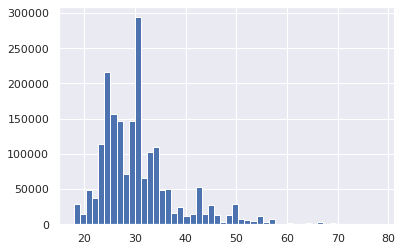

In [74]:
df['Age (Sender)'].hist(bins=50)

In [75]:
# statistics on sender age
df['Age (Sender)'].describe()


count    1.922072e+06
mean     3.068642e+01
std      7.626634e+00
min      1.800000e+01
25%      2.600000e+01
50%      2.900000e+01
75%      3.300000e+01
max      7.800000e+01
Name: Age (Sender), dtype: float64

In [76]:
# mean value of sender age 30 years, min age 18 years, max age 78 years

In [77]:
# receiver age

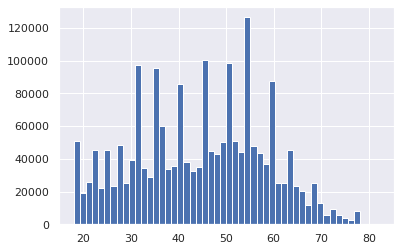

In [78]:
df['Age (Receiver)'].hist(bins=50)

In [79]:
df['Age (Receiver)'].describe()

count    1.921520e+06
mean     4.434218e+01
std      1.371188e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.500000e+01
75%      5.500000e+01
max      8.200000e+01
Name: Age (Receiver), dtype: float64

In [80]:
# mean value of receiver age 44 years, min age 18 years, max age 82 years
# receivers on average tend to be older than senders

<h4>What about gender of senders and receivers? </h4>

In [81]:
# senders

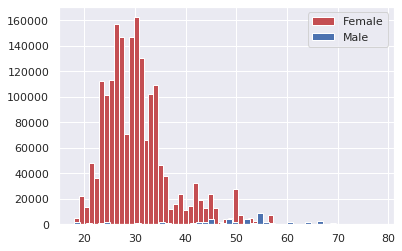

In [82]:
df[df['Gender (Sender)']== 'Female']['Age (Sender)'].hist(bins=50,color='r',label='Female')
df[df['Gender (Sender)']== 'Male']['Age (Sender)'].hist(bins=50,label='Male')
plt.legend()
plt.show()

In [83]:
# as we can see senders are mostly females

In [84]:
df['Gender (Sender)'].value_counts()/df_len

Female    0.971505
Male      0.028495
Name: Gender (Sender), dtype: float64

In [85]:
# 97 % of messages are sent by women and 3% by men

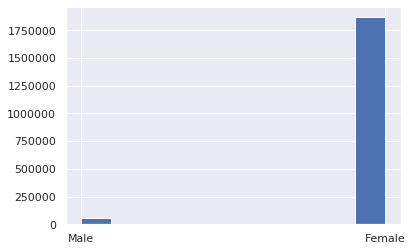

In [92]:
df['Gender (Sender)'].hist()

In [86]:
# receivers

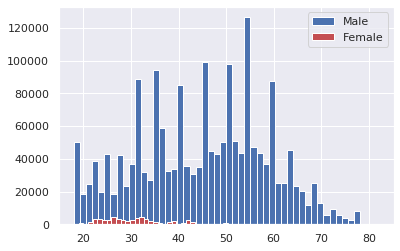

In [87]:
df[df['Gender (Receiver)']== 'Male']['Age (Receiver)'].hist(bins=50,label='Male')
df[df['Gender (Receiver)']== 'Female']['Age (Receiver)'].hist(bins=50,color='r',label='Female')
plt.legend()
plt.show()

In [89]:
# receivers are mostly males

In [90]:
df['Gender (Receiver)'].value_counts()/df_len

Male      0.971549
Female    0.028451
Name: Gender (Receiver), dtype: float64

In [91]:
# 97% of messages are received by males and 3% by females

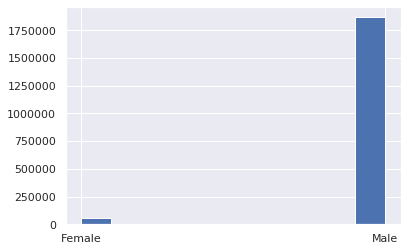

In [93]:
df['Gender (Receiver)'].hist()

<h4>What age groups communicate to each other?</h4>

In [99]:
# both genders overall

df1age=pd.crosstab(df['Age (Sender)'],df['Age (Receiver)'])
df1age.head()

Age (Receiver),18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,82.0
Age (Sender),,,,,,,,,,,,,,,,,,,,,
18.0,219,157,223,191,127,491,242,303,146,500,...,7,6,13,4,3,4,9,0,0,0
19.0,824,458,491,574,446,517,563,1110,486,460,...,27,19,42,12,25,20,45,2,0,0
20.0,522,265,344,374,297,356,313,714,316,229,...,28,14,29,13,13,8,34,1,0,0
21.0,1156,677,742,1691,873,1111,791,1555,689,717,...,131,76,86,74,76,47,129,6,0,0
22.0,909,672,741,1109,617,963,941,1716,645,739,...,66,11,70,34,28,23,91,2,0,0


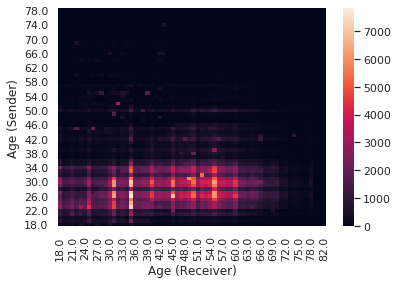

In [101]:
# let's plot heatmap

ax=sns.heatmap(df1age,annot=False)
ax.invert_yaxis()

In [102]:
# as we can see from the heatmap mostly 22 to 34 year olds are sending messages to receivers
# of different age from 18 to 66 years old

/home/yaroslav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


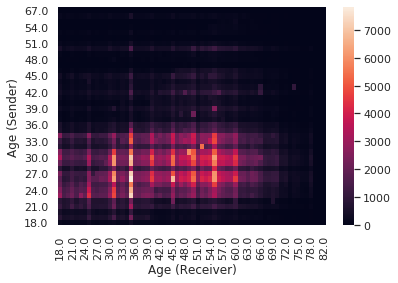

In [103]:
# female to male messages

df201=df[df['Gender (Sender)']== 'Female'][df['Gender (Receiver)']== 'Male']

df2age=pd.crosstab(df201['Age (Sender)'],df201['Age (Receiver)'])
df2age.head()

ax=sns.heatmap(df2age,annot=False)
ax.invert_yaxis()

In [104]:
# young females 21 to 35 years old are sending messages to males 18 to 66 years old

/home/yaroslav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


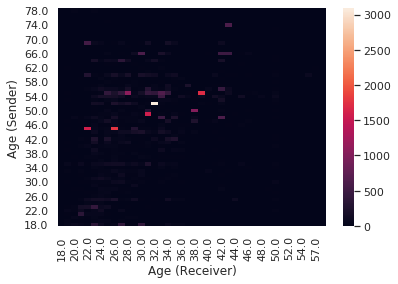

In [105]:
# male to female messages

df301=df[df['Gender (Sender)']== 'Male'][df['Gender (Receiver)']== 'Female']

df3age=pd.crosstab(df301['Age (Sender)'],df301['Age (Receiver)'])
df3age.head()

ax=sns.heatmap(df3age,annot=False)
ax.invert_yaxis()

In [106]:
# older males 46 to 74 years old are sending messages to females 20 to 44 years old

/home/yaroslav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


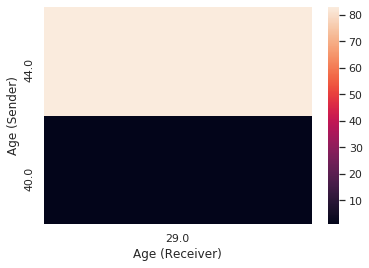

In [107]:
# male to male messages

df401=df[df['Gender (Sender)']== 'Male'][df['Gender (Receiver)']== 'Male']

df4age=pd.crosstab(df401['Age (Sender)'],df401['Age (Receiver)'])
df4age.head()

ax=sns.heatmap(df4age,annot=False)
ax.invert_yaxis()

In [110]:
df401['User ID (Sender)'].unique()

array([19731752466, 20549750045])

In [112]:
# looks like there are only two male user who send messages to a 29 year old male

In [113]:
# female to female messages -no female to female messages

df501=df[df['Gender (Sender)']== 'Female'][df['Gender (Receiver)']== 'Female']

df501.size



#df2age=pd.crosstab(df201['Age (Sender)'],df201['Age (Receiver)'])
#df2age.head()

#ax=sns.heatmap(df2age,annot=False)
#ax.invert_yaxis()

/home/yaroslav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [114]:
# surprisingly enough, there are no female to female messages

In [115]:
# let's summarize gender statistics

In [116]:
df1gender=pd.crosstab(df['Gender (Sender)'],df['Gender (Receiver)'])
df1gender.head()

Gender (Receiver),Female,Male
Gender (Sender),,
Female,0,1867308
Male,54685,84


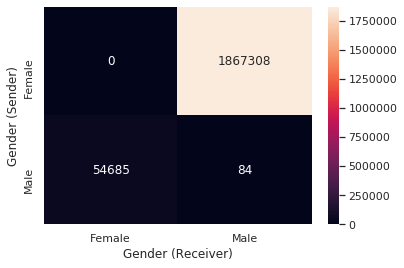

In [118]:
# heatmap

sns.heatmap(df1gender,annot=True,fmt='d')

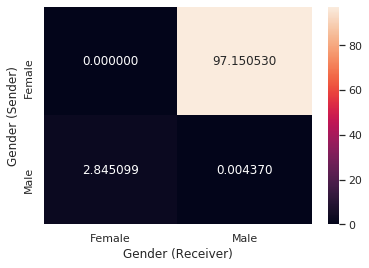

In [120]:
# or in percents

df1gender_norm=df1gender/df_len*100 # in per cent
sns.heatmap(df1gender_norm,annot=True,fmt='f')


<h4> What about gender and age charachteristics of senders from different countries?</h4>

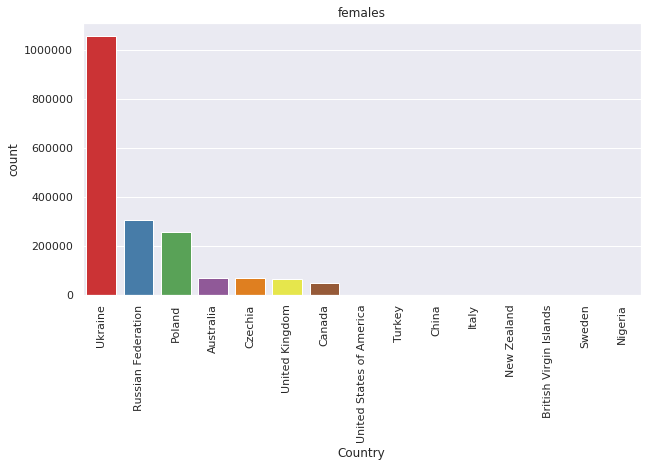

In [128]:
plt.figure(figsize=(10,5))
plt.title('females')

da11=df['Country'].value_counts().index[0:15]

df1=df[df["Country"].isin(da11)]



chart = sns.countplot(
    data=df1[df1['Gender (Sender)']=='Female'],
    x='Country',
    palette='Set1',
    order = df1['Country'].value_counts().index
)

chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [130]:
# females who send messages are coming mostly from Ukraine, Russian Federation, Poland, Australia,
# Czecia, UK, and Canada

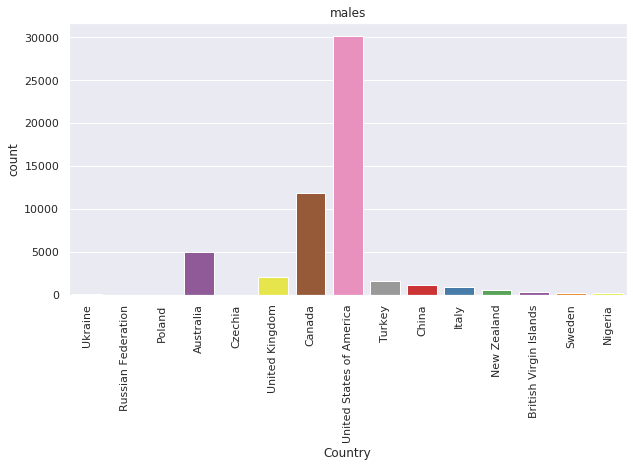

In [129]:
plt.figure(figsize=(10,5))
plt.title('males')

da11=df['Country'].value_counts().index[0:15]

df1=df[df["Country"].isin(da11)]



chart = sns.countplot(
    data=df1[df1['Gender (Sender)']=='Male'],
    x='Country',
    palette='Set1',
    order = df1['Country'].value_counts().index
)

chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [132]:
# males who send messages are coming mostly from the US, Canada, Australia, UK,Turkey, China, Italy

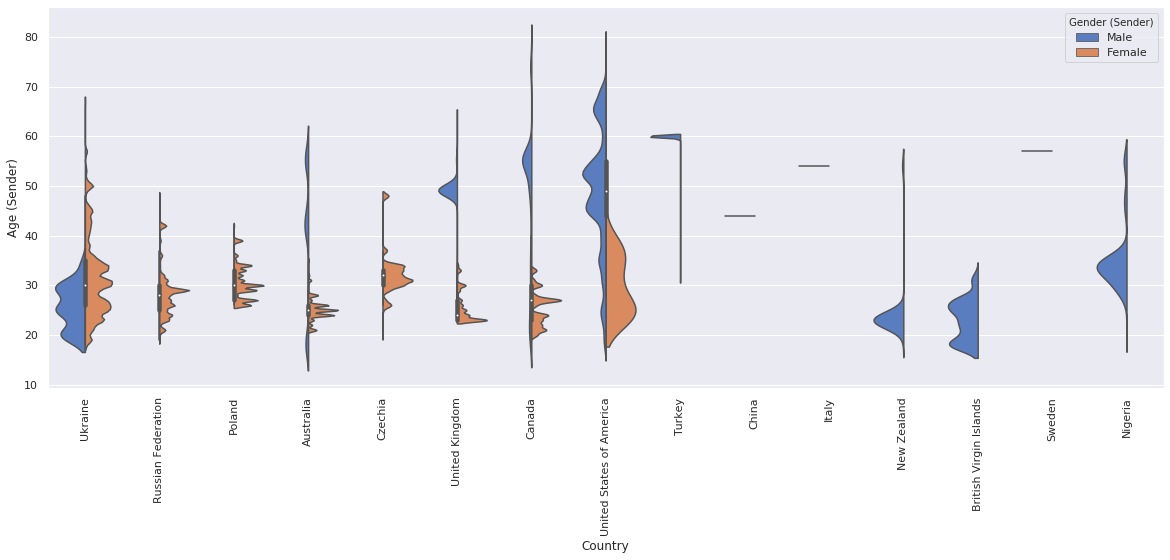

In [133]:
# let's make some violin plots for top 15 countries

plt.figure(figsize=(20,7))

# top 15 countries

da11=df['Country'].value_counts().index[0:15]

df1=df[df["Country"].isin(da11)]
                      

chart = sns.violinplot(x="Country", y="Age (Sender)", data=df1,
                order = df1['Country'].value_counts().index,
                       palette='muted',split=True,
                       hue='Gender (Sender)'
                      )
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [135]:
# we can make different conclusions from this, for example (conclusions about users who actively send messages):
# male users from Ukraine are slightly younger than female users from Ukraine,
# while the opposite is true for USA, Canada, UK,and Australia
# there are hardly any male users in Russia, Poland, Czechia, 
# while there are hardly any female users in Turkey, China, Italy, Sweden, New Zealand, Nigeria, and Virgin Islands

<h4> What about the time trend in number of sent messages? </h4>

In [136]:
df['Action Date'].min()

Timestamp('2019-10-01 00:00:06')

In [137]:
df['Action Date'].max()

Timestamp('2019-11-15 00:00:00')

In [138]:
# we have the database for messages sent from 2019-10-01 to 2019-11-15

In [139]:
df['Action Date'].head()

0   2019-10-16 10:15:02
1   2019-10-05 01:05:19
2   2019-10-12 12:11:59
3   2019-10-16 10:15:36
4   2019-10-15 10:05:04
Name: Action Date, dtype: datetime64[ns]

In [140]:
# convert to time series and group by hour

time_series_action = pd.Series(1, index = df['Action Date'])

time_series_action1 = time_series_action.resample('H').sum()
time_series_action1.head()

Action Date
2019-10-01 00:00:00    1627
2019-10-01 01:00:00    1540
2019-10-01 02:00:00    1554
2019-10-01 03:00:00    1840
2019-10-01 04:00:00    1878
Freq: H, dtype: int64

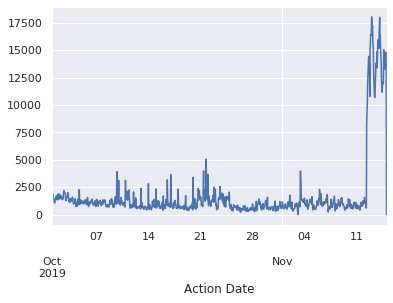

In [141]:
time_series_action1.plot(kind='line')


In [142]:
#there is a spike in traffic after November 11, 2019

In [143]:
# let's check if this has anything to do with the registration of the users on the website

In [144]:
df['Reg Date (Sender)'].min()

Timestamp('2014-02-26 09:21:19')

In [145]:
df['Reg Date (Sender)'].max()

Timestamp('2019-11-14 21:45:49')

In [146]:
df.shape

(1922077, 14)

In [147]:
# there are 1922077 unique messages, however we have lower number of unique users:

In [148]:
df_users=df[~df.duplicated(subset=['User ID (Sender)'], keep='first')]

In [149]:
df_users.shape

(3900, 14)

In [151]:
# 3900 unique users (who sent messages)

In [152]:
time_series_reg = pd.Series(1, index = df_users['Reg Date (Sender)'])

In [153]:
# let's group by registration date

time_series_reg= time_series_reg.resample('D').sum()
time_series_reg.head()

Reg Date (Sender)
2014-02-26    2
2014-02-27    0
2014-02-28    6
2014-03-01    2
2014-03-02    2
Freq: D, dtype: int64

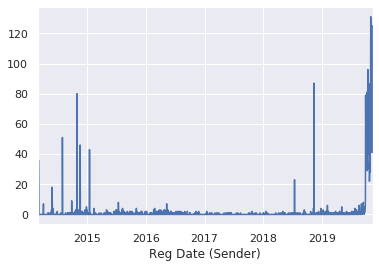

In [154]:
time_series_reg.plot(kind='line')


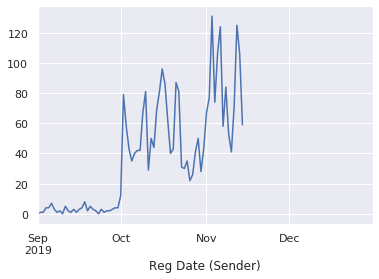

In [156]:
# as we can see there is a spike in registration in late 2019
# let's zoom in:
import datetime
time_series_reg.plot(kind='line', xlim=[datetime.date(2019, 9, 1),datetime.date(2019, 12, 31)])


In [157]:
# the spike occured approximately 1 month before the spike in traffic

<h4> Where the unique users are comming from? 
(earlier we did the stats on the basis of messages sent, not unique users )  </h4>

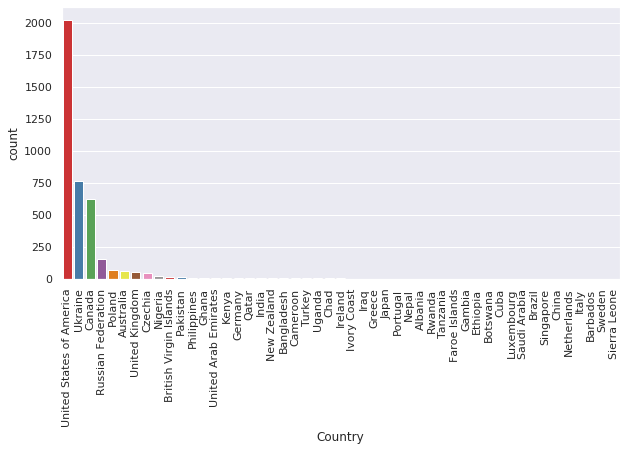

In [160]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df_users,
    x='Country',
    palette='Set1',
    order = df_users['Country'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);


In [162]:
df_users['Country'].value_counts()

United States of America    2022
Ukraine                      763
Canada                       619
Russian Federation           151
Poland                        69
Australia                     60
United Kingdom                55
Czechia                       43
Nigeria                       17
British Virgin Islands        15
Pakistan                      10
Philippines                    7
Ghana                          6
United Arab Emirates           5
Kenya                          5
Germany                        5
Qatar                          4
India                          4
New Zealand                    4
Bangladesh                     2
Cameroon                       2
Turkey                         2
Uganda                         2
Chad                           2
Ireland                        2
Ivory Coast                    1
Iraq                           1
Greece                         1
Japan                          1
Portugal                       1
Nepal     

In [163]:
# out of 3900 overall users most are coming from the US (2022), Ukraine comes next (763), 
# Canada (619), Russia (151), others less than 100

In [164]:
# this is surprising taking into account that most messages were sent from
# Ukraine, Russia, and Poland, as we determined earlier:
#Ukraine                     1057048
#Russian Federation           306220
#Poland                       255197
#Australia                     73113
#Czechia                       69205
#United Kingdom                65833
#Canada                        59602
#United States of America      30199
# meaning that US and Canadian users are not as active as Eastern European ones

<h4>Age and gender statistics of the users from top 15 countries (by number of users)</h4>

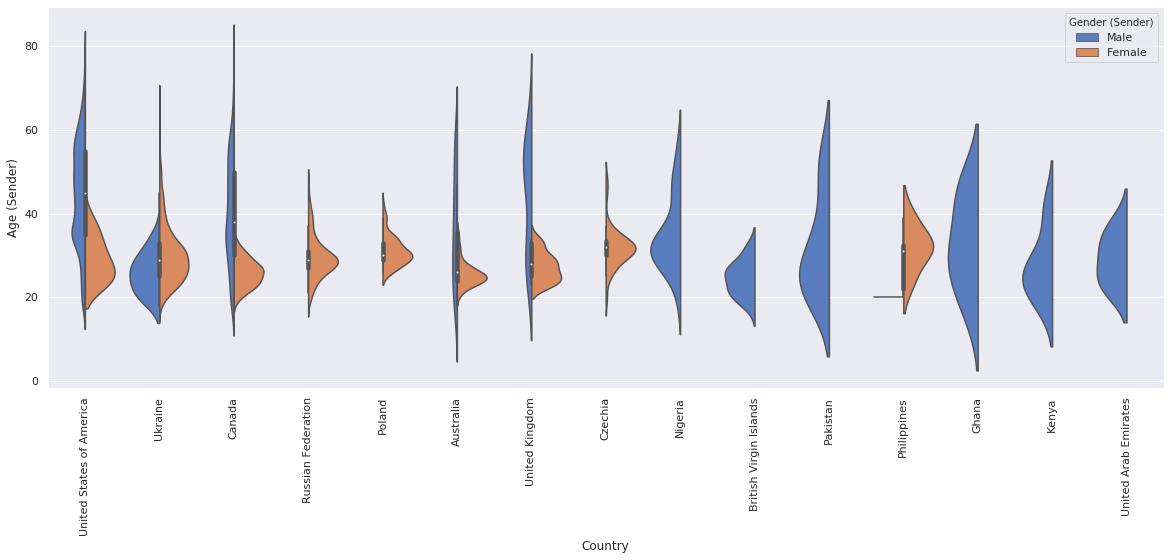

In [170]:
plt.figure(figsize=(20,7))

# top 15 countries

da1=df_users['Country'].value_counts().index[0:15]

df_users1=df_users[df_users["Country"].isin(da1)]
                      

chart = sns.violinplot(x="Country", y="Age (Sender)", data=df_users1,
                order = df_users1['Country'].value_counts().index,
                       palette='muted',split=True,
                       hue='Gender (Sender)'
                      )
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);


In [171]:
# Broad distribution of male ages for US, Canada, UK, Australia, males from these countries tend to be older than females
# males form Ukraine are slightly younger than females from Ukraine
# only females for Russia,Poland, Phillipines
# only males for Nigeria, Virgin Islands, Pakistan, Ghana, Kenya, UAE

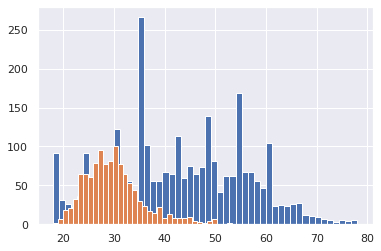

In [175]:
df_users[df_users['Gender (Sender)']=='Male']['Age (Sender)'].hist(bins=50)
df_users[df_users['Gender (Sender)']=='Female']['Age (Sender)'].hist(bins=50)


In [177]:
df_users[df_users['Gender (Sender)']=='Male']['Age (Sender)'].describe()

count    2767.000000
mean       43.021684
std        12.935301
min        18.000000
25%        34.000000
50%        43.000000
75%        54.000000
max        78.000000
Name: Age (Sender), dtype: float64

In [178]:
df_users[df_users['Gender (Sender)']=='Female']['Age (Sender)'].describe()

count    1131.000000
mean       29.824050
std         6.196487
min        18.000000
25%        26.000000
50%        29.000000
75%        33.000000
max        67.000000
Name: Age (Sender), dtype: float64

In [179]:
# female users tend to be younger than male users and have narrower distribution of age
# female: mean 30 , std 6
# male: mean 43, std 13


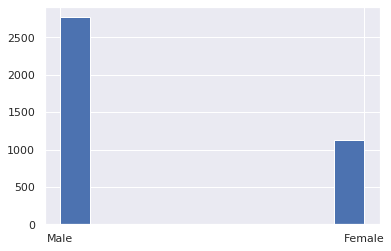

In [180]:
# it is also interesting that there are overall 2767 male users and less than twice as less
# female users (1131), while females account for 97% of overall sent messages

df_users['Gender (Sender)'].hist()

<h4>What about testers vs users?</h4>

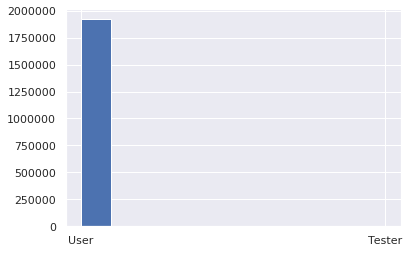

In [181]:
df['Tester mark (Sender)'].hist()

In [182]:
df['Tester mark (Sender)'].describe()

count     1922077
unique          2
top          User
freq      1920939
Name: Tester mark (Sender), dtype: object

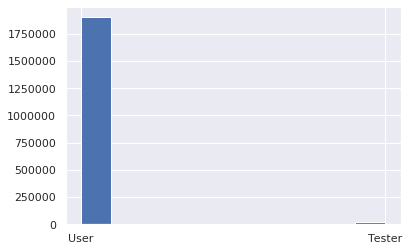

In [183]:
df['Tester mark (Receiver)'].hist()

In [184]:
df['Tester mark (Sender)'].describe()

count     1922077
unique          2
top          User
freq      1920939
Name: Tester mark (Sender), dtype: object

In [185]:
df1tester=pd.crosstab(df['Tester mark (Sender)'],df['Tester mark (Receiver)'])
df1tester.head()

Tester mark (Receiver),Tester,User
Tester mark (Sender),,
Tester,813,325
User,18951,1901988


In [186]:
# 813 messages from tester to tester, 325 from tester to user, and 18951 from user to tester

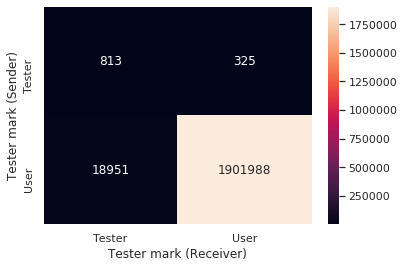

In [188]:
# plot heatmap
sns.heatmap(df1tester,annot=True,fmt='d')

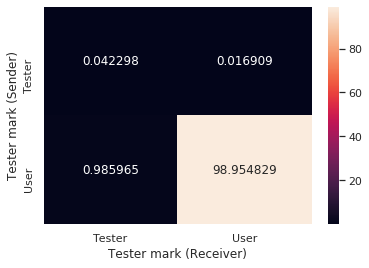

In [189]:
# convert to percents
df1tester_norm=df1tester/df_len*100
sns.heatmap(df1tester_norm,annot=True,fmt='f')

In [190]:
# 98.9% is user to user traffic

In [191]:
# how many tester do we have?

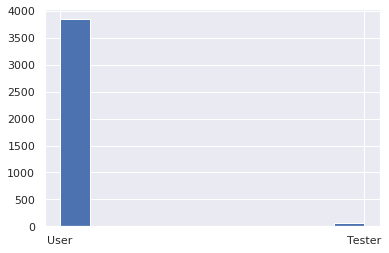

In [193]:
df_users['Tester mark (Sender)'].hist()

In [195]:
df_users['Tester mark (Sender)'].describe()

count     3900
unique       2
top       User
freq      3846
Name: Tester mark (Sender), dtype: object

In [196]:
# 3846 users and 54 testers

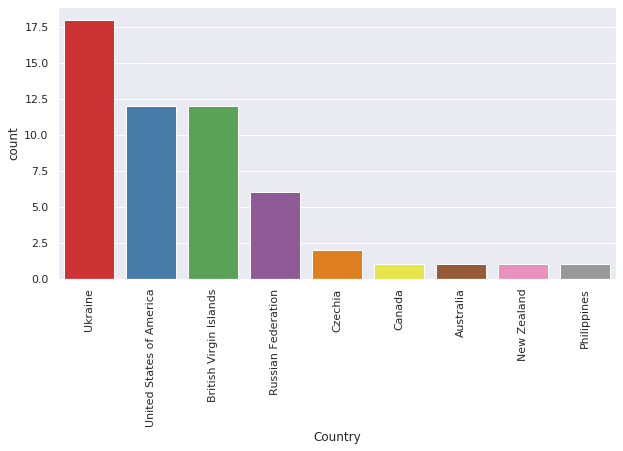

In [198]:
# where are the testers coming from?

df_testers=df_users[df_users['Tester mark (Sender)']=='Tester']

plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df_testers,
    x='Country',
    palette='Set1',
    order = df_testers['Country'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [199]:
df_testers['Country'].value_counts()

Ukraine                     18
United States of America    12
British Virgin Islands      12
Russian Federation           6
Czechia                      2
Canada                       1
Australia                    1
New Zealand                  1
Philippines                  1
Name: Country, dtype: int64

In [200]:
# 18 testers from Ukraine, 12 from US and Virgin islands each, 6 from Russia, 2 from Czecia, 
# and 1 from Canada, Australia, New Zealand and Philippines each

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

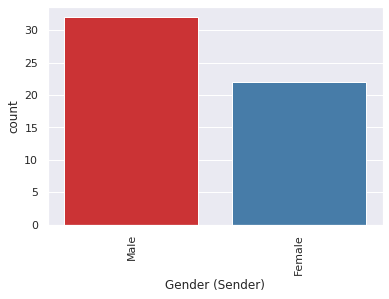

In [201]:
# gender of the testers?

chart = sns.countplot(
    data=df_testers,
    x='Gender (Sender)',
    palette='Set1',
    order = df_testers['Gender (Sender)'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [202]:
df_testers['Gender (Sender)'].value_counts()

Male      32
Female    22
Name: Gender (Sender), dtype: int64

In [203]:
# 32 males and 22 females

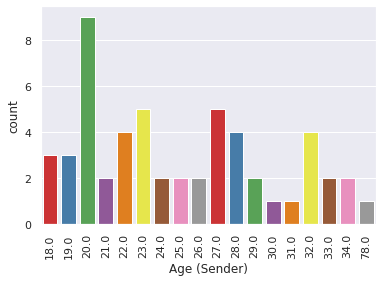

In [204]:
# age of the testers?

chart = sns.countplot(
    data=df_testers,
    x='Age (Sender)',
    palette='Set1',
    #order = df_testers['Age (Sender)'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [206]:
# One 78 year old, othes 18 to 34

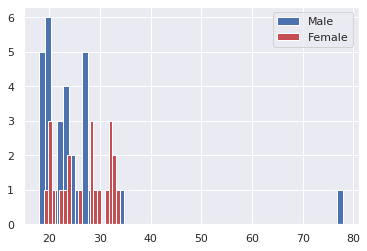

In [207]:
df_testers[df_testers['Gender (Sender)']== 'Male']['Age (Sender)'].hist(bins=50,label='Male')
df_testers[df_testers['Gender (Sender)']== 'Female']['Age (Sender)'].hist(bins=20,color='r',label='Female')
plt.legend()
plt.show()

In [208]:
# 78 year old is male

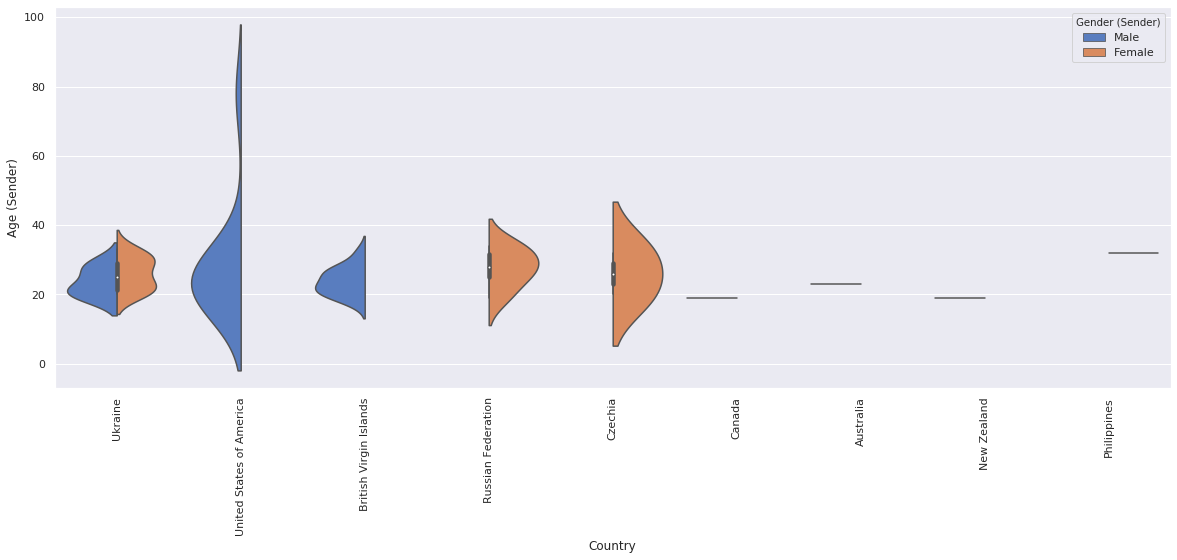

In [210]:
# violyn plot age vs gender, country

plt.figure(figsize=(20,7))





                      

chart = sns.violinplot(x="Country", y="Age (Sender)", data=df_testers,
                order = df_testers['Country'].value_counts().index,
                       palette='muted',split=True,
                       hue='Gender (Sender)'
                      )
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

In [212]:
# only male testers from USA, Virgin Islands,Canada, Australia, New Zealand
# only female testers from Russia, Czecia, the Philippines
# both male and female testers from Ukraine